In [1]:
# import stuff
import matplotlib.pyplot as plt
import numpy as np
from pose_dataset import DataGenerator as PoseDataGenerator

# Pose Dataset

In [2]:
data_path = '../../datasets/pascal3d_pose'

Images Shape : (4, 10, 6, 128, 128) | Labels Shape : (4, 10, 6, 1)


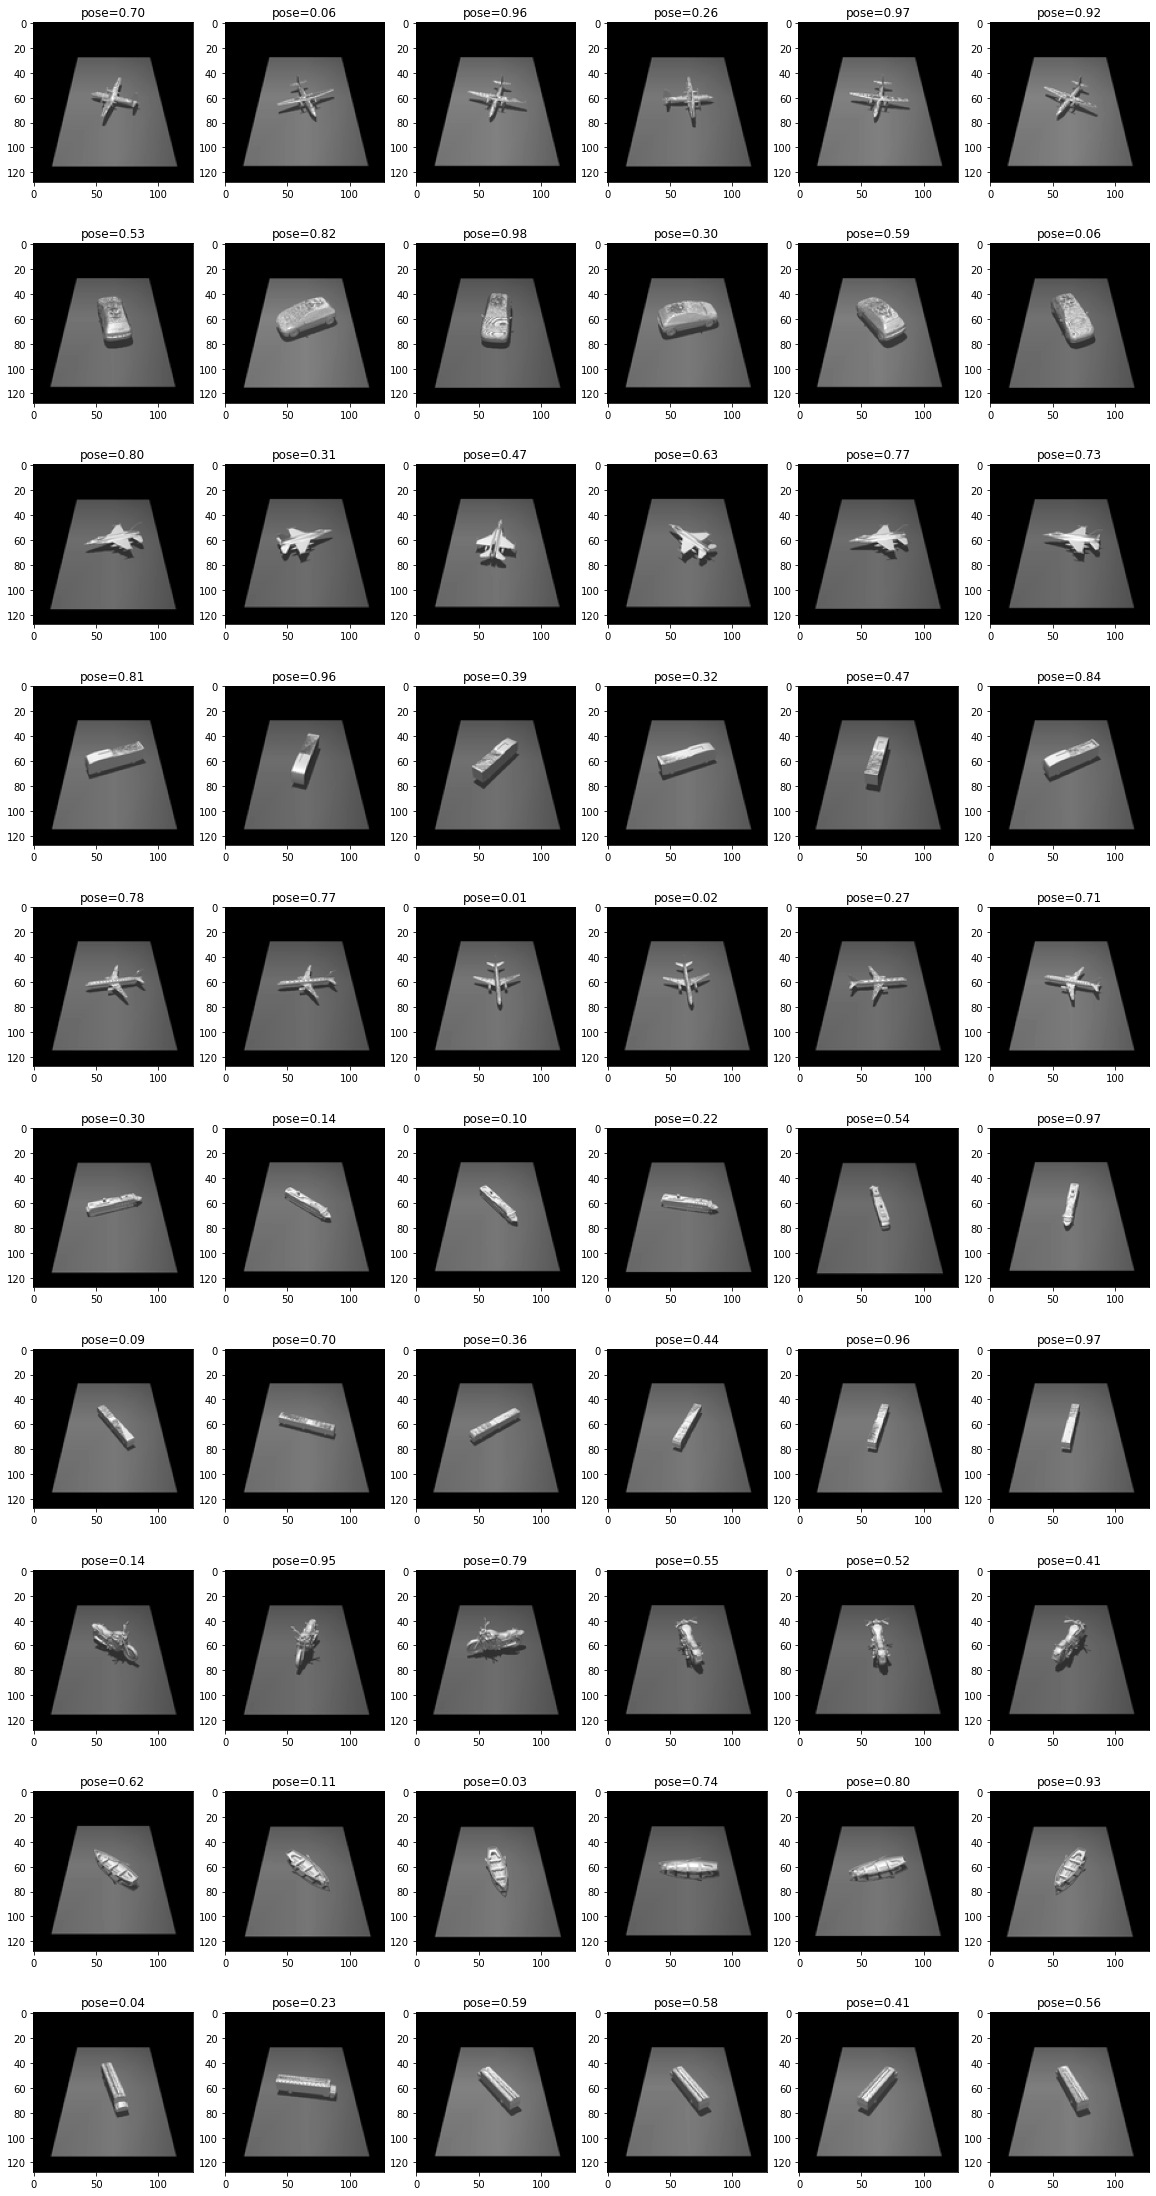

In [5]:
dgen = PoseDataGenerator(num_objects=10, num_samples_per_object=6, num_meta_objects=10, num_meta_test_samples_per_object=6,
                            config={'data_folder':data_path})

# get a meta training batch
imgs, labels = dgen.sample_batch(batch_type='meta_train', batch_size=4, shuffle=True)
imgs = np.reshape(imgs, newshape=(-1, dgen.num_objects, dgen.num_samples_per_object, dgen.img_size[0], dgen.img_size[1]))
print('Images Shape : {} | Labels Shape : {}'.format(imgs.shape, labels.shape))

# show images
plt.figure(figsize=(20,40))
for i in range(dgen.num_objects):
  for j in range(dgen.num_samples_per_object):
    plt.subplot(dgen.num_objects, dgen.num_samples_per_object, i*dgen.num_samples_per_object+j+1)
    plt.imshow(imgs[0, i, j], cmap='gray')
    plt.title('pose={:.2f}'.format(labels[0][i][j][0]))
plt.show()

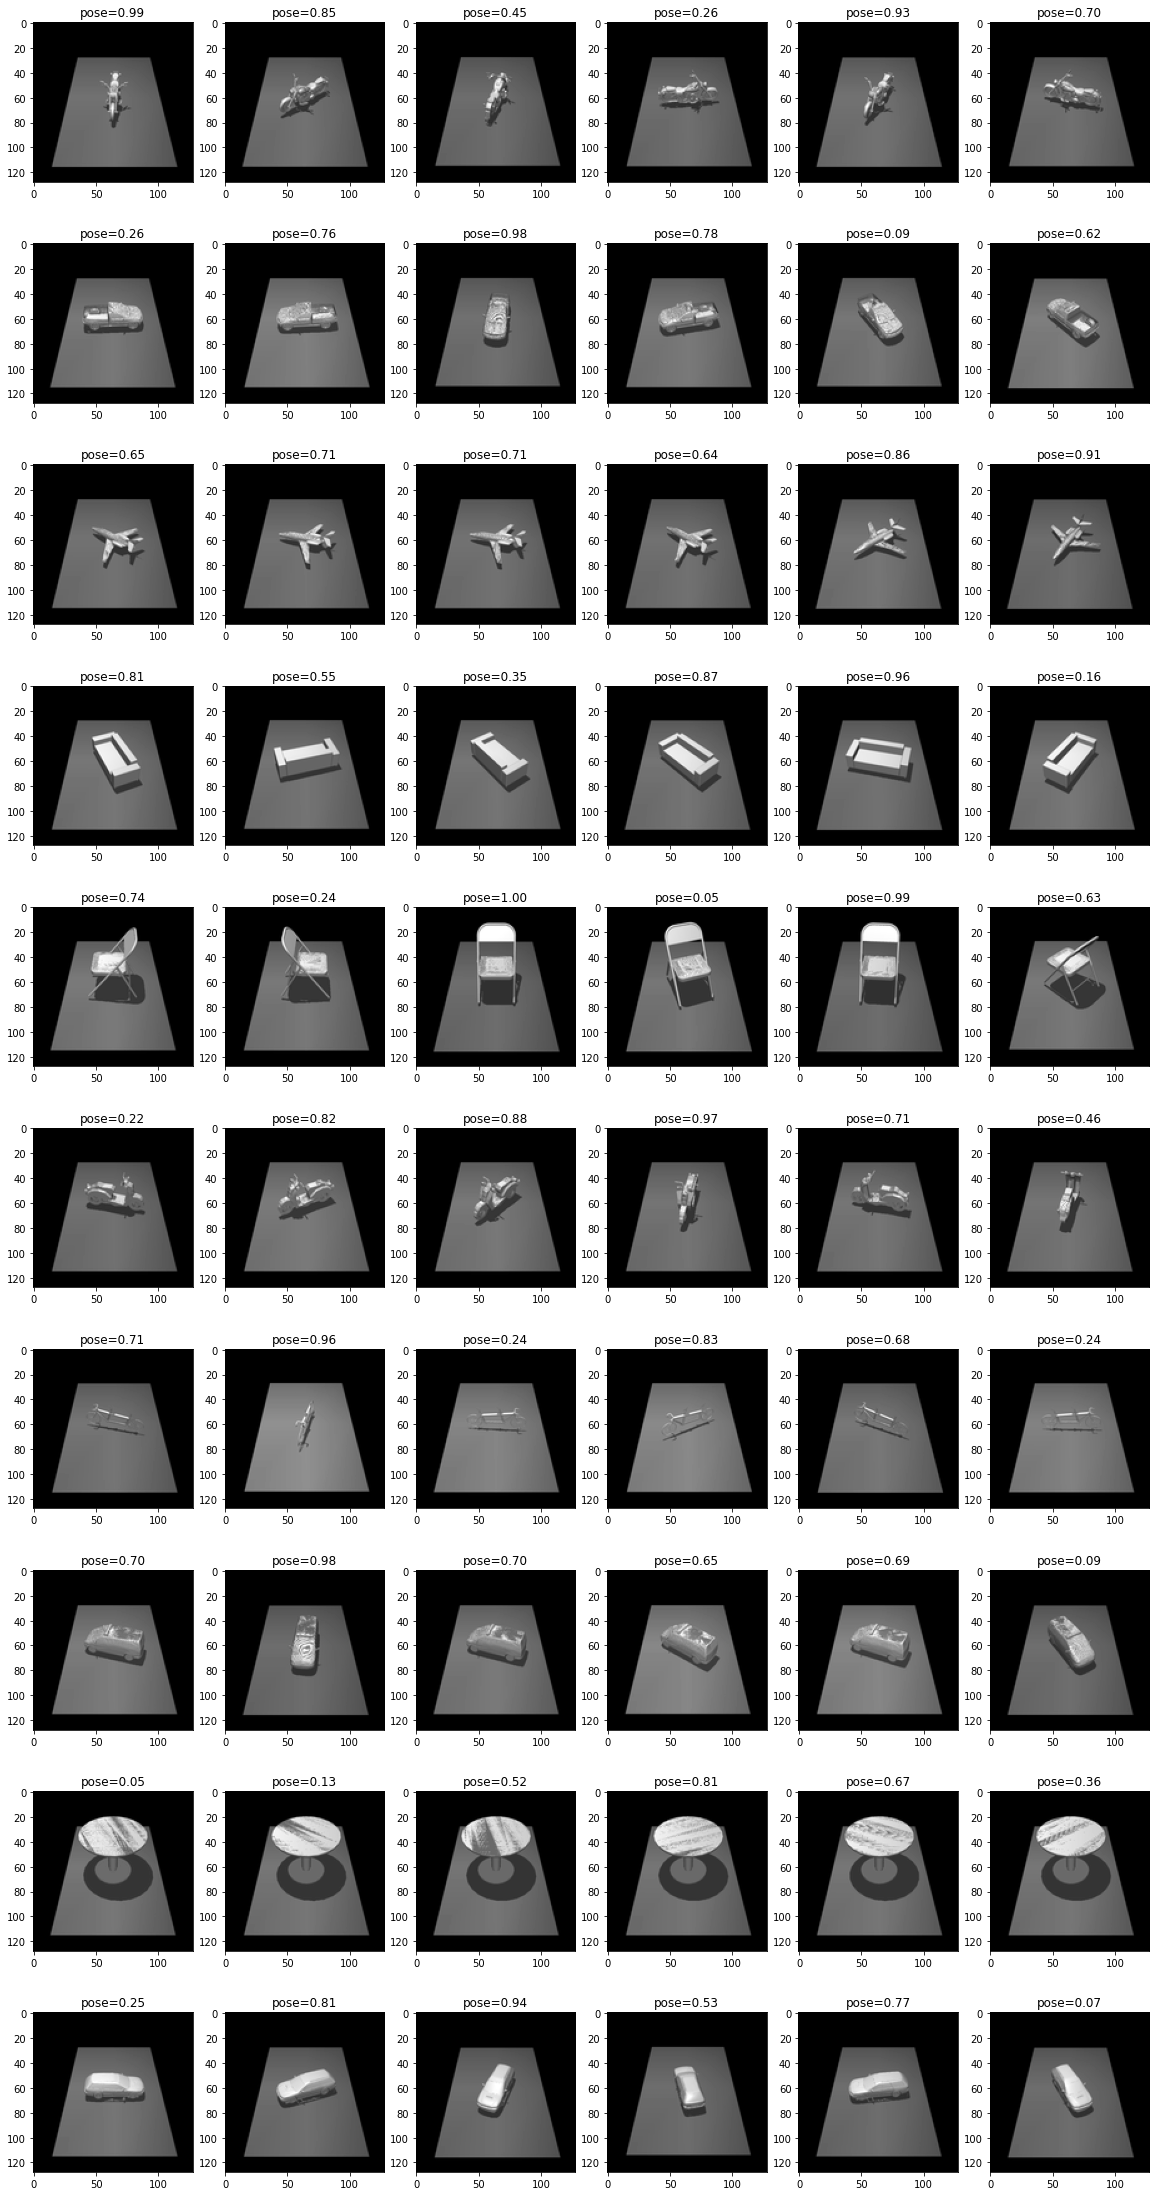

In [6]:
# get a meta testing batch
imgs, labels = dgen.sample_batch(batch_type='meta_val', batch_size=4, shuffle=True)
imgs = np.reshape(imgs, newshape=(-1, dgen.num_meta_objects, dgen.num_meta_test_samples_per_object, dgen.img_size[0], dgen.img_size[1]))
# print('Images Shape : {} | Labels Shape : {}'.format(imgs.shape, labels.shape))

# show images
plt.figure(figsize=(20,40))
for i in range(dgen.num_meta_objects):
  for j in range(dgen.num_meta_test_samples_per_object):
    plt.subplot(dgen.num_meta_objects, dgen.num_meta_test_samples_per_object, i*dgen.num_meta_test_samples_per_object+j+1)
    plt.imshow(imgs[0, i, j], cmap='gray')
    plt.title('pose={:.2f}'.format(labels[0][i][j][0]))
plt.show()

# Omniglot Dataset

Training Dataset   | Num of characters: 1100, Num of classes:  5
Validation Dataset | Num of characters:  100, Num of classes:  5
Testing Dataset    | Num of characters:  423, Num of classes:  5


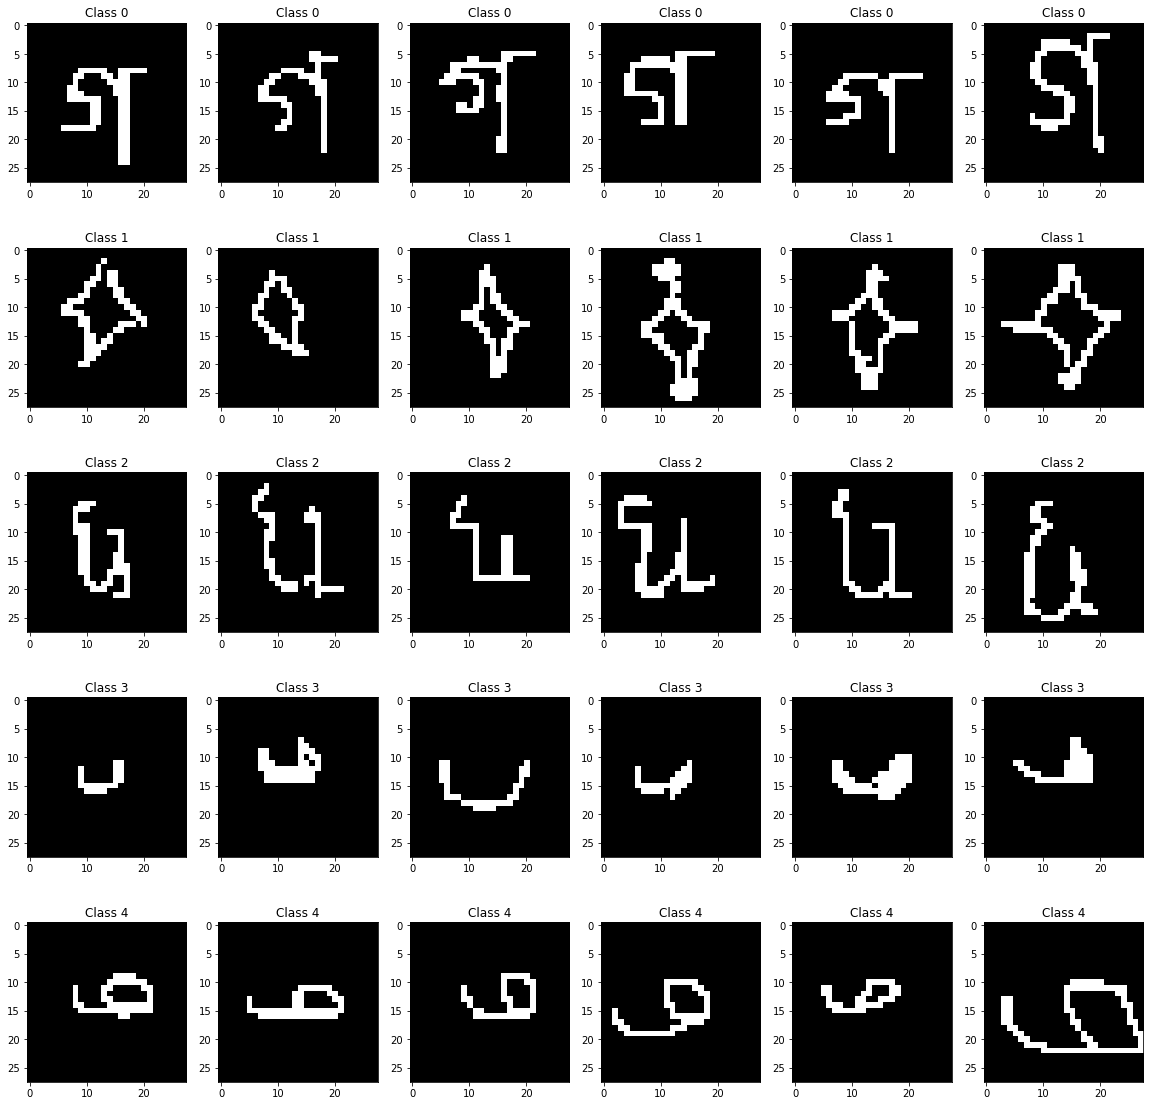

In [2]:
from omniglot import DataGenerator as OmniglotDataGenerator
dgen = OmniglotDataGenerator(num_classes=5, num_samples_per_class=6, num_meta_test_classes=5, num_meta_test_samples_per_class=6, 
                         config={'labels_folder':'../../datasets/omniglot_resized/labels',
                                 'data_folder':'../../datasets/omniglot_resized'})

# print info
dgen.print_dataset_info()

# get a meta training batch
imgs, labels = dgen.sample_batch(batch_type='meta_train', batch_size=4, shuffle=True)
imgs = np.reshape(imgs, newshape=(-1, dgen.num_classes, dgen.num_samples_per_class, dgen.img_size[0], dgen.img_size[1]))
# print('Images Shape : {} | Labels Shape : {}'.format(imgs.shape, labels.shape))

# show images
plt.figure(figsize=(20,20))
for i in range(dgen.num_classes):
  for j in range(dgen.num_samples_per_class):
    plt.subplot(dgen.num_classes, dgen.num_samples_per_class, i*dgen.num_samples_per_class+j+1)
    plt.imshow(imgs[0, i, j], cmap='gray')
    plt.title('Class {}'.format(np.argmax(labels[0, i, j])))
plt.show()

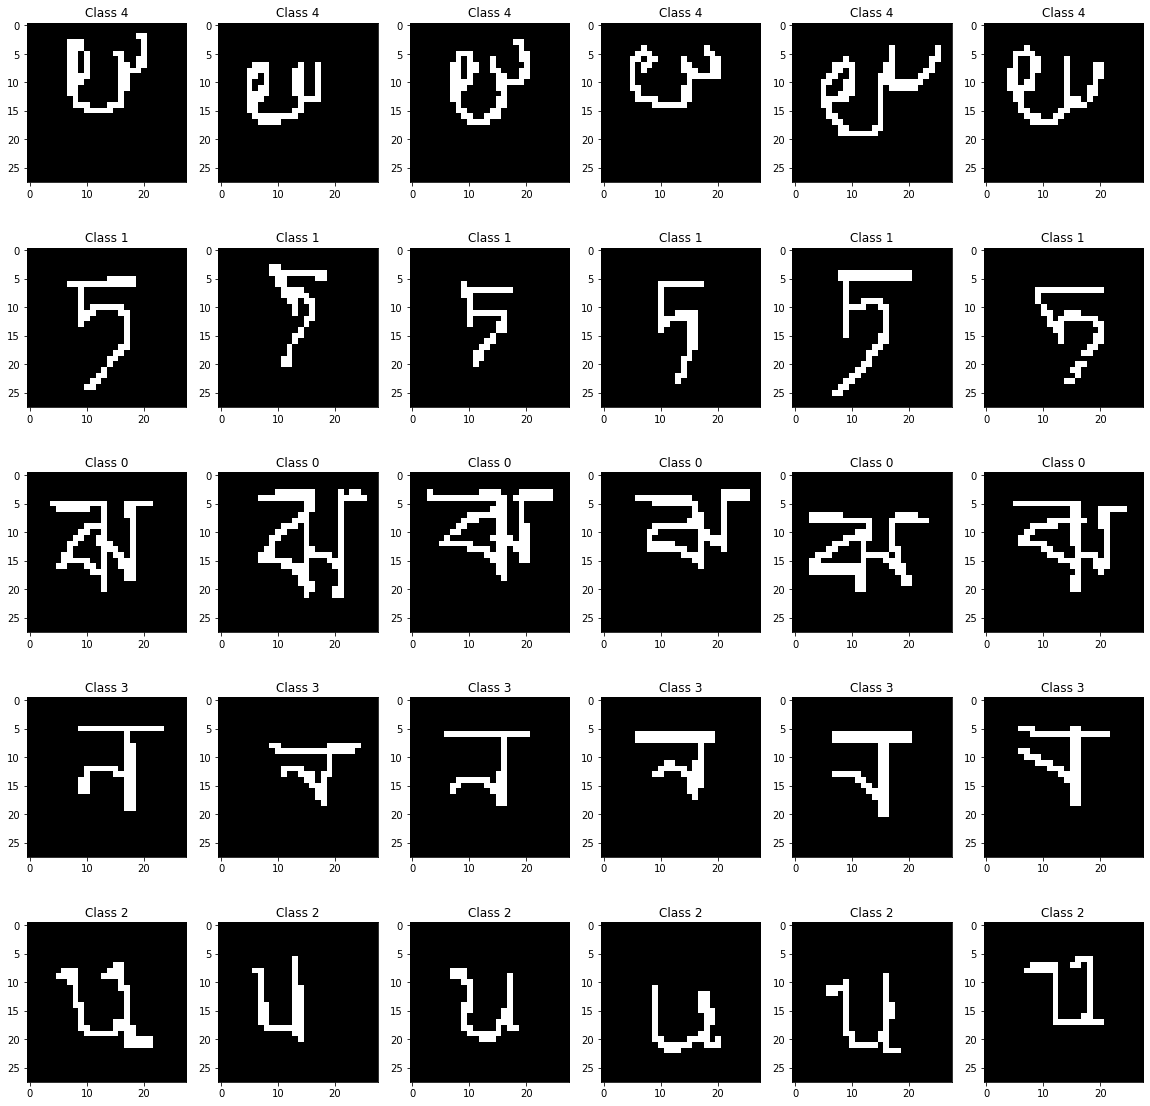

In [3]:
# get a meta testing batch
imgs, labels = dgen.sample_batch(batch_type='meta_test', batch_size=4, shuffle=True)
imgs = np.reshape(imgs, newshape=(-1, dgen.num_meta_test_classes, dgen.num_meta_test_samples_per_class, dgen.img_size[0], dgen.img_size[1]))
# print('Images Shape : {} | Labels Shape : {}'.format(imgs.shape, labels.shape))

# show images
plt.figure(figsize=(20,20))
for i in range(dgen.num_meta_test_classes):
  for j in range(dgen.num_meta_test_samples_per_class):
    plt.subplot(dgen.num_meta_test_classes, dgen.num_meta_test_samples_per_class, i*dgen.num_meta_test_samples_per_class+j+1)
    plt.imshow(imgs[0, i, j], cmap='gray')
    plt.title('Class {}'.format(np.argmax(labels[0, i, j])))
plt.show()